# incomplete columns -  integer/float 

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import DataFarme
df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/immoscout_cleaned_lat_lon_fixed_v9.csv")

# filter for columns with floats and integers
df_floats = df.select_dtypes(include=['float64', 'int64'])

# print head of DataFrame
display(df_floats.head(1))

# create a list with the column names
float_columns = df_floats.columns.tolist()
print(float_columns)


C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,...,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,price_cleaned,Space extracted,rooms
0,0,0,47.4171,8.0856,16620,0.511176,0.286451,0.090908,47.415927,8.08584,...,686.0,2.234259,5.89,14.0,9.0,308.0,331.0,1150000.0,100.0,5.0


['Unnamed: 0', 'Unnamed: 0.1', 'lat', 'lon', 'index', 'ForestDensityL', 'ForestDensityM', 'ForestDensityS', 'Latitude', 'Longitude', 'NoisePollutionRailwayL', 'NoisePollutionRailwayM', 'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM', 'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM', 'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM', 'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS', 'Zip', 'distanceToTrainStation', 'gde_area_agriculture_percentage', 'gde_area_forest_percentage', 'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage', 'gde_average_house_hold', 'gde_empty_apartments', 'gde_foreigners_percentage', 'gde_new_homes_per_1000', 'gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp', 'gde_politics_fdp', 'gde_politics_glp', 'gde_politics_gps', 'gde_politics_pda', 'gde_politics_rights', 'gde_politics_sp', 'gde_politics_svp', 'gde_pop_per_km2', 'gde_population', 'gde_private_apartmen

In [3]:
# get all coloumns with nan values into a list
nan_columns = df_floats.columns[df_floats.isna().any()].tolist()

# subset dataframe with nan_columns
df_nan = df_floats[nan_columns]

# display head of df_nan
display(df_nan.head(1))

# print nan_columns
print(nan_columns)

,lat,lon,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,gde_politics_sp,gde_politics_svp,price_cleaned,Space extracted,rooms
0,47.4171,8.0856,5.873715,4.579662,3.359031,18.35536,6.057269,7.066814,NaN,0.220264,20.392805,30.809471,1150000.0,100.0,5.0


['lat', 'lon', 'gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp', 'gde_politics_fdp', 'gde_politics_glp', 'gde_politics_gps', 'gde_politics_pda', 'gde_politics_rights', 'gde_politics_sp', 'gde_politics_svp', 'price_cleaned', 'Space extracted', 'rooms']


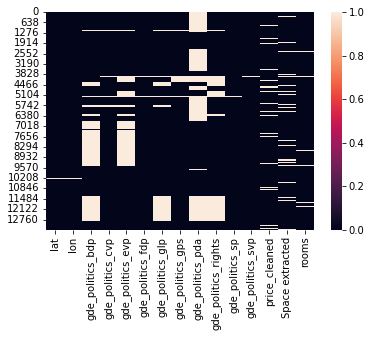

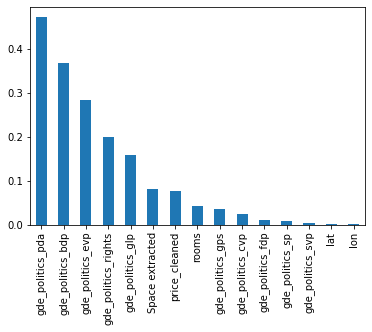

In [4]:
# create isna heatmap
sns.heatmap(df_nan.isna(), cbar=True)
plt.show()

# get the proportion of nan values for each column and visualize it
df_nan_prop = df_nan.isna().mean().sort_values(ascending=False)
df_nan_prop.plot(kind='bar')
plt.show()


### Imputation strategy
Missing values impute with knn imputer, neighbours = 10

### Notice
Need to check if there is another possibility to handle Na values for lat and lon!

In [5]:
# create for each coloumn a complete_flag column
for col in df_nan.columns:
    df_nan[col + '_complete_flag'] = df_nan[col].isna()

# display head of df_nan
display(df_nan.head(1))


<ipython-input-5-c9974482fa2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan[col + '_complete_flag'] = df_nan[col].isna()


,lat,lon,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,...,gde_politics_fdp_complete_flag,gde_politics_glp_complete_flag,gde_politics_gps_complete_flag,gde_politics_pda_complete_flag,gde_politics_rights_complete_flag,gde_politics_sp_complete_flag,gde_politics_svp_complete_flag,price_cleaned_complete_flag,Space extracted_complete_flag,rooms_complete_flag
0,47.4171,8.0856,5.873715,4.579662,3.359031,18.35536,6.057269,7.066814,NaN,0.220264,...,False,False,False,True,False,False,False,False,False,False


,lat,lon,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,...,gde_politics_fdp_complete_flag,gde_politics_glp_complete_flag,gde_politics_gps_complete_flag,gde_politics_pda_complete_flag,gde_politics_rights_complete_flag,gde_politics_sp_complete_flag,gde_politics_svp_complete_flag,price_cleaned_complete_flag,Space extracted_complete_flag,rooms_complete_flag
0,47.4171,8.0856,5.873715,4.579662,3.359031,18.35536,6.057269,7.066814,2.307155,0.220264,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


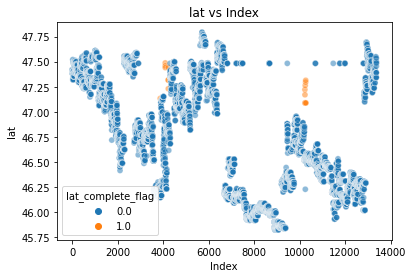

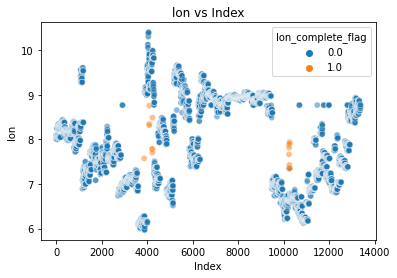

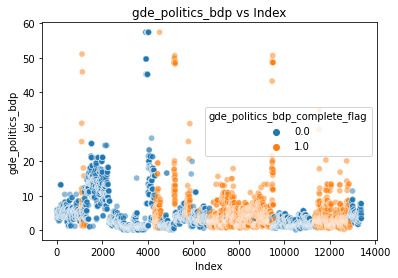

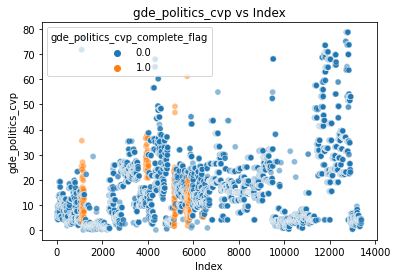

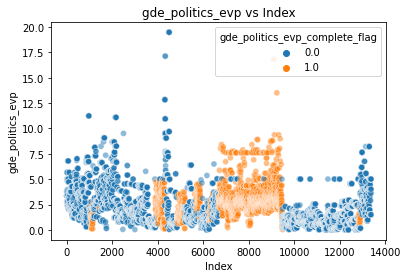

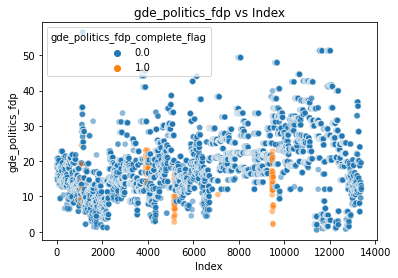

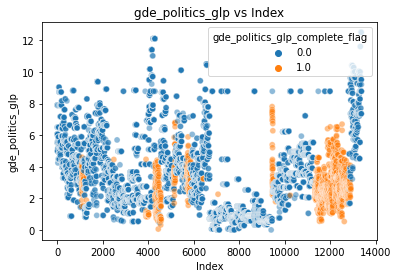

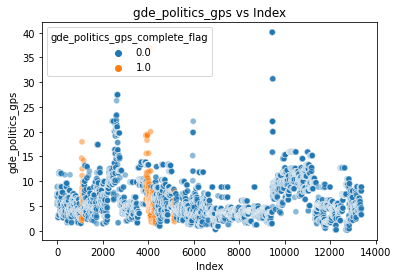

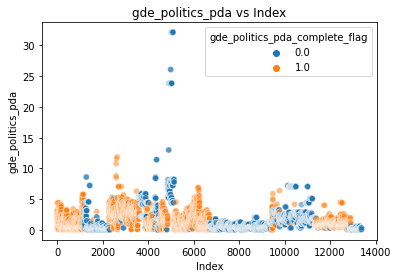

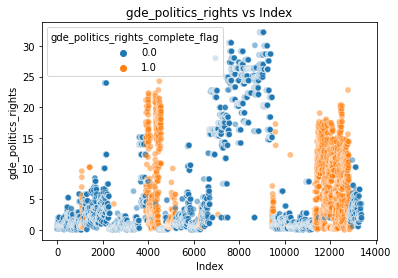

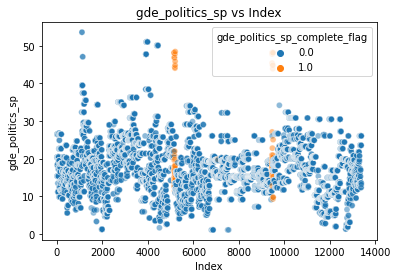

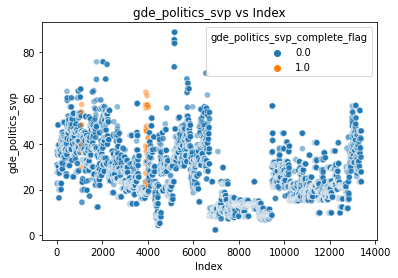

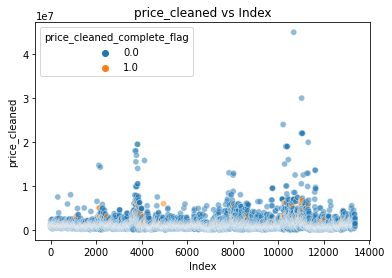

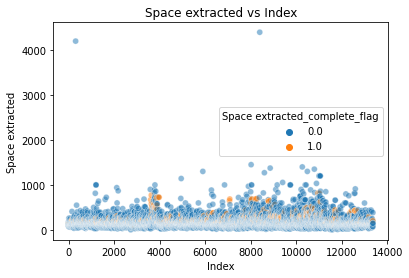

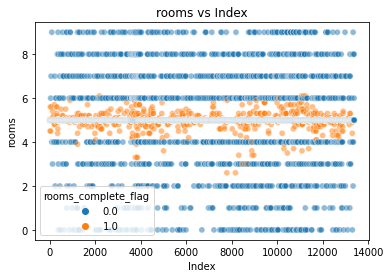

In [6]:
# use knn imputer to impute missing values
from sklearn.impute import KNNImputer

# create a knn imputer
imputer = KNNImputer(n_neighbors=10)

# fit the imputer to the df_nan
imputer.fit(df_nan)

# transform the df_nan
df_nan_imputed = imputer.transform(df_nan)

# create a new dataframe with the imputed values
df_nan_imputed = pd.DataFrame(df_nan_imputed, columns=df_nan.columns)

# display head of df_nan_imputed
display(df_nan_imputed.head(1))

# visualize the imputed values
for col in df_nan_imputed.columns[0:15]:
    sns.scatterplot(x=df_nan_imputed.index, y=df_nan_imputed[col], alpha=0.5, hue = df_nan_imputed[col + '_complete_flag'])
    # label the x-axis
    plt.xlabel('Index')
    # label the y-axis
    plt.ylabel(col)
    # label title
    plt.title(col + " vs Index")
    plt.show()

In [7]:
# create a function to impute missing values in defined columns
def impute_missing_values(df):
    '''
    INPUT:
    df - pandas dataframe
    col_list - list of columns to impute
    imputer - sklearn imputer object
    
    OUTPUT:
    df - pandas dataframe with imputed values
    '''
    # defining columns to impute
    col_list = ['gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp', 'gde_politics_fdp', 'gde_politics_glp', 'gde_politics_gps', 'gde_politics_pda', 'gde_politics_rights', 'gde_politics_sp', 'gde_politics_svp', 'price_cleaned', 'Space extracted', 'rooms']
    # use knn imputer to impute missing values
    from sklearn.impute import KNNImputer
    # create a knn imputer
    imputer = KNNImputer(n_neighbors=10)
    # create a dataframe with the columns to impute
    df_impute = df[col_list]
    # fit the imputer to the df_impute
    imputer.fit(df_impute)
    # transform the df_impute
    df_imputed = imputer.transform(df_impute)
    # create a new dataframe with the imputed values
    df_imputed = pd.DataFrame(df_imputed, columns=df_impute.columns)
    # replace the values in the original dataframe
    df[col_list] = df_imputed
    # return the dataframe
    return df

In [8]:
# use the imputer function
df_test = impute_missing_values(df)

# select the imputed columns and count missing values
df_test[nan_columns].isna().sum()

lat                    17
lon                    17
gde_politics_bdp        0
gde_politics_cvp        0
gde_politics_evp        0
gde_politics_fdp        0
gde_politics_glp        0
gde_politics_gps        0
gde_politics_pda        0
gde_politics_rights     0
gde_politics_sp         0
gde_politics_svp        0
price_cleaned           0
Space extracted         0
rooms                   0
dtype: int64